### <h1> Task 1 <h1> (Поиск минимума/максимума в векторе)

In [1]:
from IPython.display import display
import pandas as pd
from myplots import Plots
from doExperiments import DoExperiments

In [2]:
from pathlib import Path
import os

PATH_TO_MPI = Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_minmax.exe")
FILE_NAME = Path('data/OpenMPI/minmax_mpi.csv')

# args_in_right_order=[alpha, beta] - range of values in vector 
if not os.path.exists(FILE_NAME):
    exp = DoExperiments(exe_path=PATH_TO_MPI, 
                        args_in_right_order=[1.0, 1000.0], 
                        columns_names=['Num_Threads', 'Iter', 'Time'])
    exp.run(filename=FILE_NAME)
else:
    print(f"File '{FILE_NAME}' already exists. Skipping function execution.")

File 'data\OpenMPI\minmax_mpi.csv' already exists. Skipping function execution.


In [3]:
data_mp = pd.read_csv('data/OpenMP/minmax_mp.csv')
data_mpi = pd.read_csv('data/OpenMPI/minmax_mpi.csv')
display(data_mp)
display(data_mpi)

,Num_Threads,Iter,Time
0,1,10,41
1,2,10,34
2,3,10,40
3,4,10,36
4,5,10,36
...,...,...,...
91,12,1000000,3703
92,13,1000000,3347
93,14,1000000,3361
94,15,1000000,3181


,Num_Threads,Iter,Time,3,4
0,1,10,20.7,214.53700,955.219
1,2,10,1091.0,202.00800,984.406
2,3,10,855.8,173.35300,934.275
3,4,10,1049.6,35.32050,709.689
4,5,10,1209.3,53.45620,988.160
...,...,...,...,...,...
91,12,1000000,6415.4,1.00022,999.999
92,13,1000000,6218.8,1.00152,999.999
93,14,1000000,5791.8,1.00283,1000.000
94,15,1000000,6318.0,1.00016,999.998


In [4]:
data = {'OpenMP': data_mp, 'OpenMPI': data_mpi}
p = Plots(tables=data, num_threads="Num_Threads", iters="Iter", time="Time")

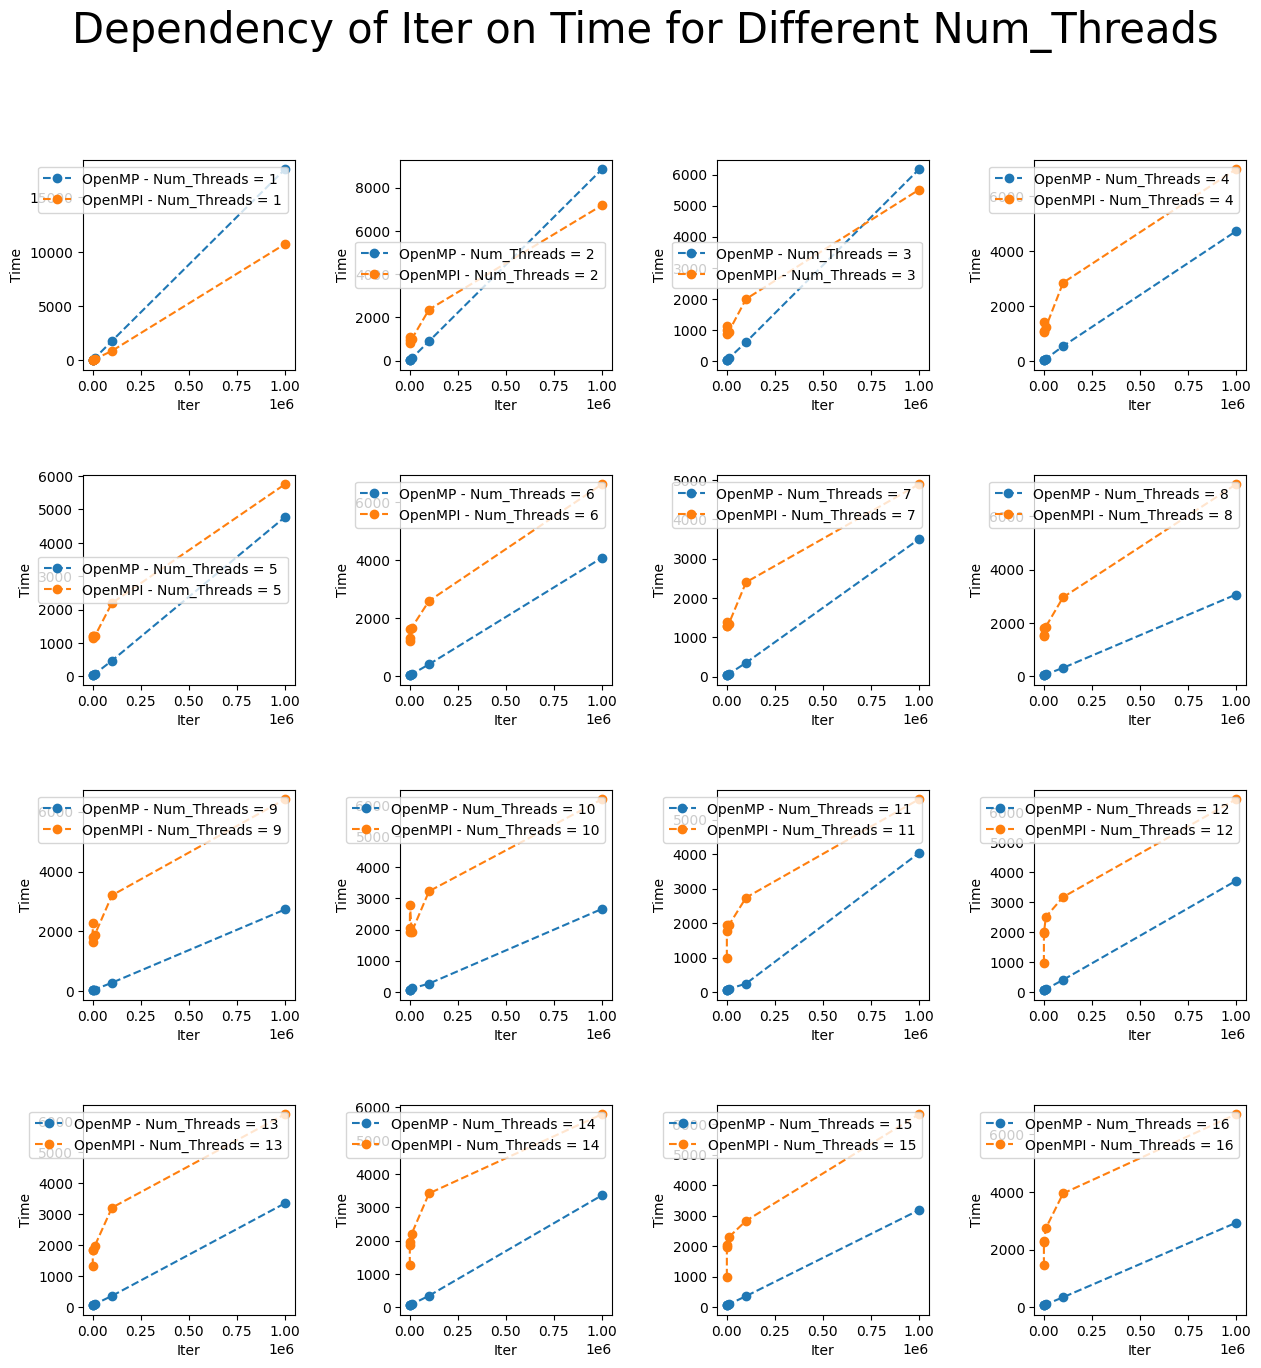

In [5]:
p.time_iter_plot()

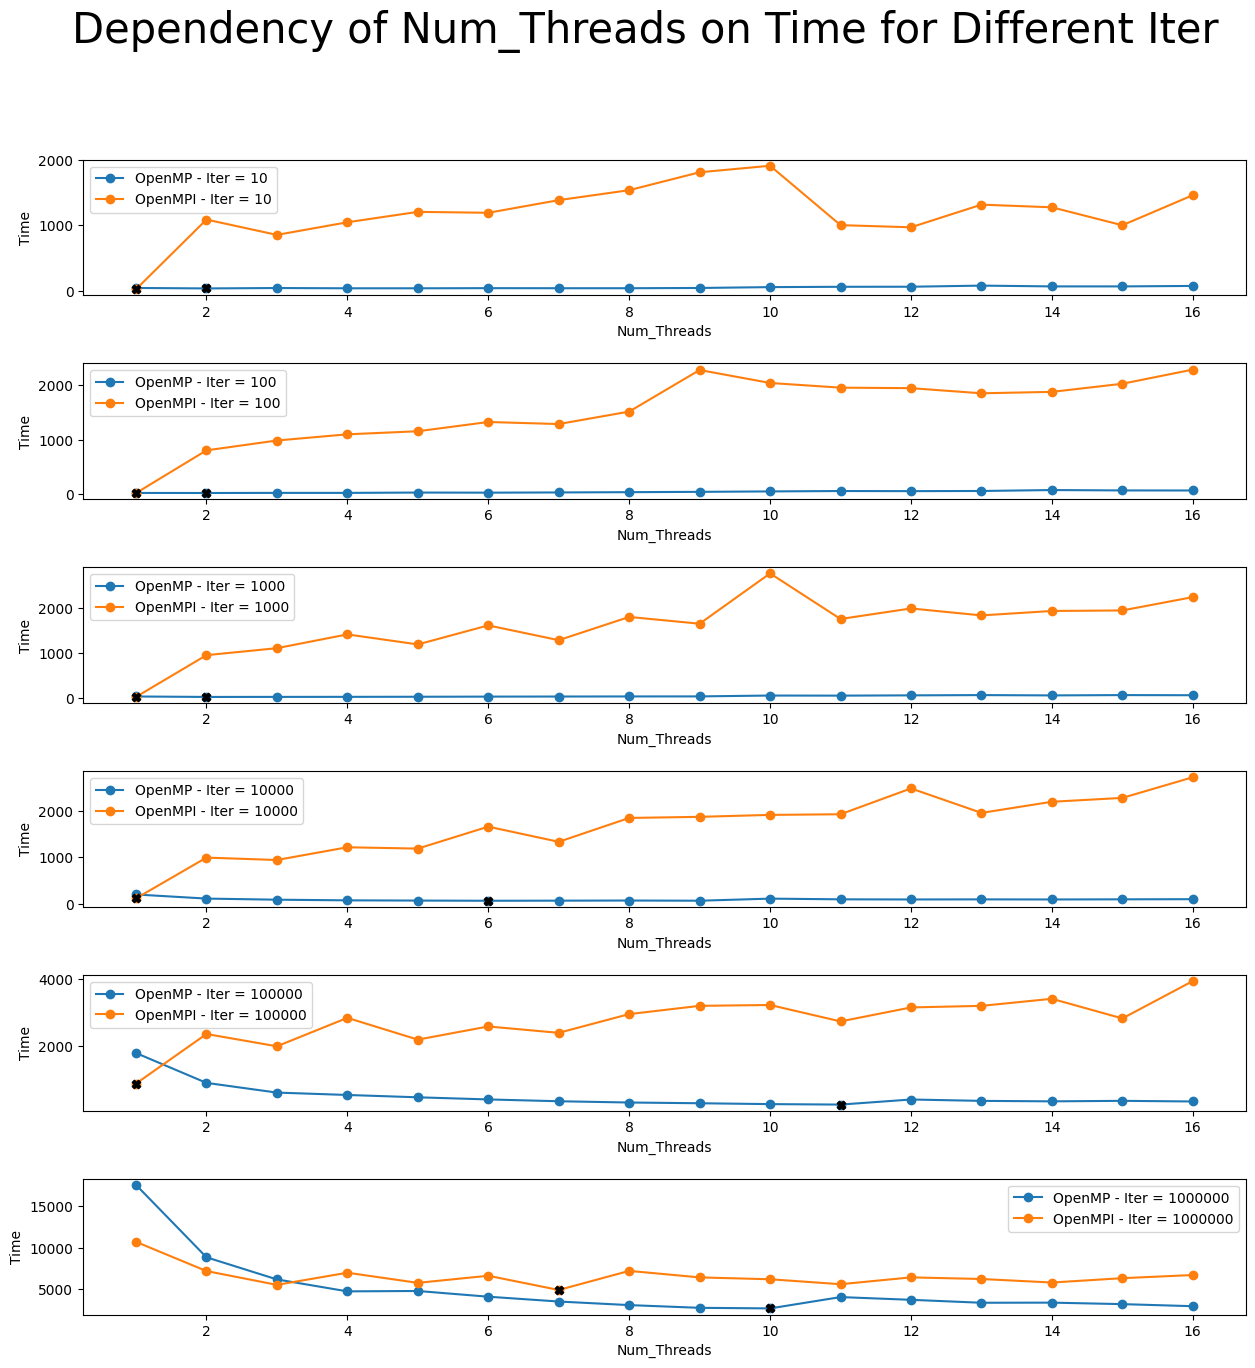

In [6]:
p.time_thread_plot()

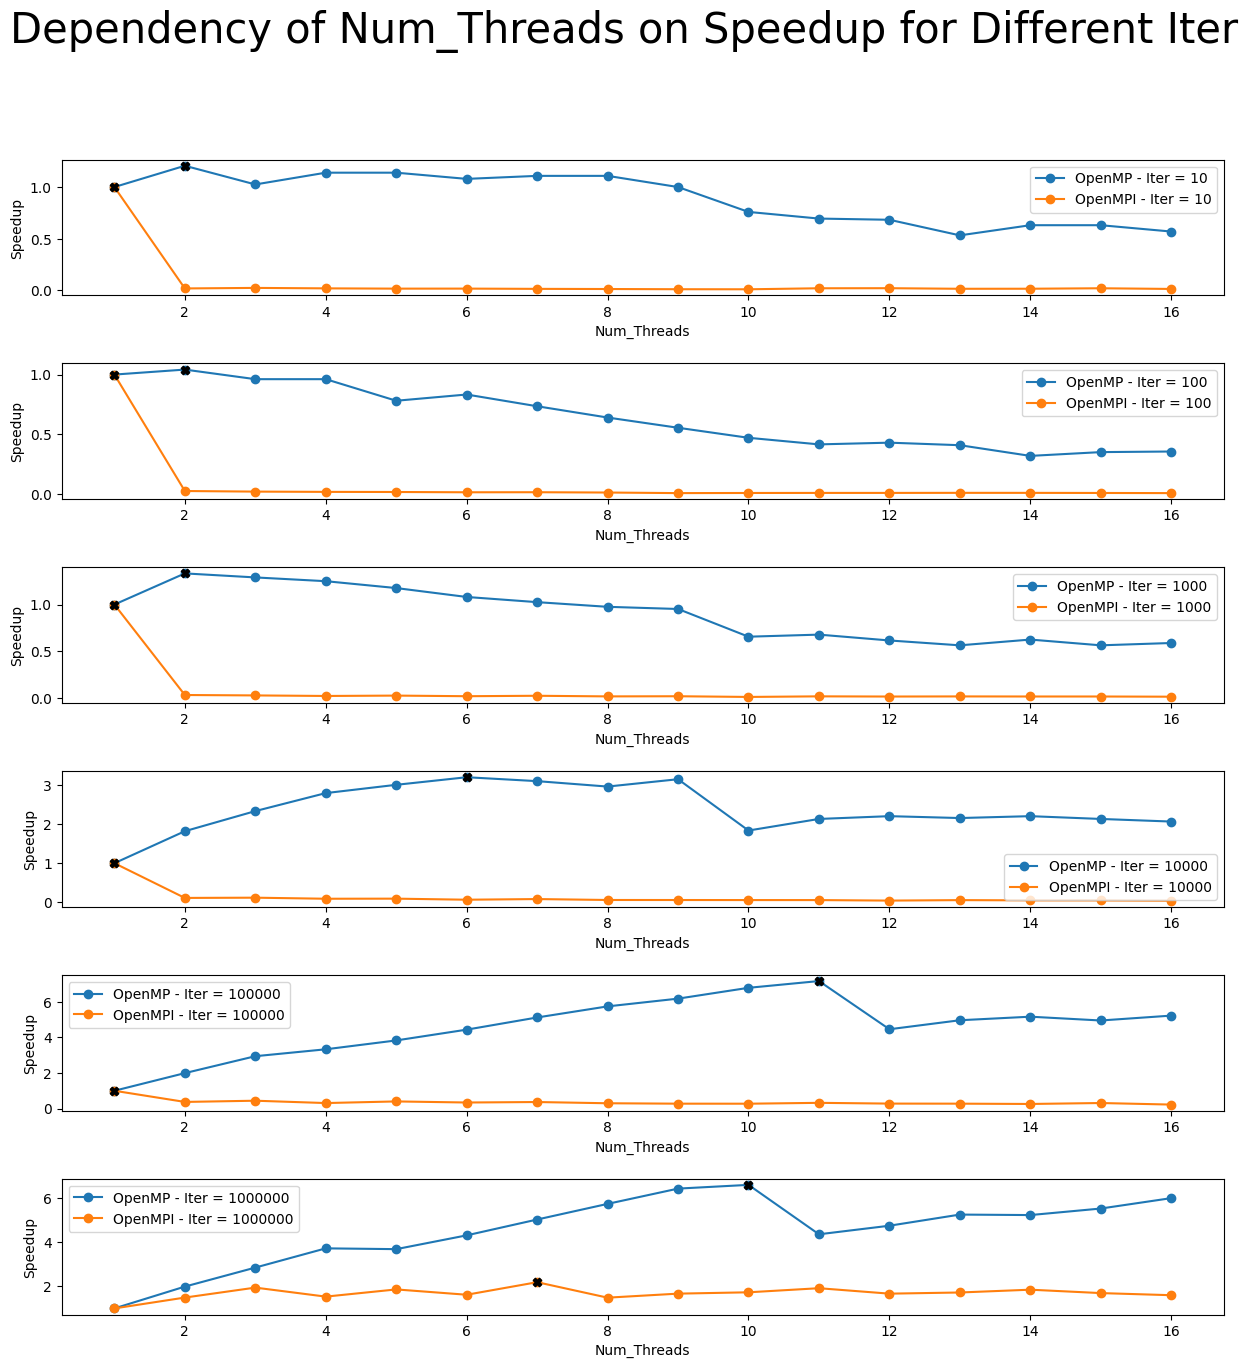

In [7]:
p.speedup_plot()

# Вывод:
Из представленных графиков можно сделать вывод, что OpenMPI проигрывает OpenMP по производительности. Но стоит сделать важные замечания:
1. Num_Threads(MPI) это не одно и то же что Num_Threads(MP).
2. Задача поиска минимума в векторе считается легковесной.
3. Все вычисления происходили на одной вычислительной машине.
4. С увеличением кол-ва итераций разность между производительностью падает.

***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 